# Previsão de Risco de Diabetes com Aprendizado de Máquina

Aluno: Eduardo Motta

Matricula: 2312697

Data: 07/07/23

## Introdução

Um médico representante de uma grande franquia de hospitais deciidu contratar nossa empresa para criação de um sistema inteligente que atendesse a demanda da seguinte história de usuário.

### História do usuário:
Como médico, parte de uma grande rede de hospitais, quero realizar a classificação automática de um paciente para prever se ele está em risco de desenvolver diabetes. Isso me ajudará a tomar decisões informadas sobre priorização dos pacientes, medidas preventivas, intervenções no estilo de vida e tratamentos personalizados para garantir o melhor cuidado possível aos meus pacientes.

### Critérios de aceitação:

* O sistema de aprendizado de máquina deve receber dados relevantes do paciente como entrada.
* O sistema deve ser capaz de analisar os dados de entrada e gerar uma previsão indicando se o paciente corre o risco de desenvolver diabetes.
* O sistema deve ser treinado em um conjunto abrangente de dados de pacientes com resultados conhecidos de diabetes para garantir previsões precisas.
* O sistema deve passar por testes e validações rigorosos para avaliar seu desempenho, incluindo métricas como acurácia, recall e F1 score.
* O sistema deve permitir atualizações regulares e retreinamento usando novos dados para aprimorar suas capacidades preditivas e se adaptar ao conhecimento médico em constante evolução.
* O sistema deve priorizar a privacidade do paciente e cumprir as regulamentações relevantes de proteção de dados, garantindo que os dados do paciente sejam anonimizados e armazenados com segurança.
* O sistema de aprendizado de máquina deve ser integrado ao sistema de prontuário eletrônico (EHR) do médico para uma integração perfeita ao fluxo de trabalho.
* O sistema de prontuário eletrônico (EHR) do médico deve estar ligado a nuvem para garantir alta disponibilidade.
* O sistema deve ter uma interface amigável que permita aos médicos inserir facilmente os dados do paciente, visualizar as previsões e acessar explicações detalhadas ou insights por trás das previsões.


### Ressalvas do usuário
O hospital possui uma equipe técnica capacitada para desenvolver uma interface gráfica (front-end) e possuem contratos com as principais provedoras de nuvem do mercado.


## Análise exploratória

### Contexto:
Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo é prever, com base em medições diagnósticas, se um paciente tem diabetes.

### Conteúdo:
Várias restrições foram aplicadas à seleção dessas instâncias de um banco de dados maior. Em particular, todas as pacientes aqui são mulheres com pelo menos 21 anos de idade, de herança indígena Pima.

* Gravidezes: Número de vezes que a paciente engravidou
* Glucose: Concentração de glucose plasmática após 2 horas de teste de tolerância à glucose oral
* Pressão sanguínea: Pressão sanguínea diastólica (mm Hg)
* Espessura da pele: Espessura da dobra cutânea do tríceps (mm)
* Insulina: Insulina sérica após 2 horas (mu U/ml)
* IMC: Índice de massa corporal (peso em kg/(altura em m)^2)
* Pedigree de diabetes: Função de pedigree de diabetes
* Idade: Idade (anos)
Resultado: Variável de classe (0 ou 1)

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

full_path = os.path.join('../livroescd-main/','diabetes.csv')
dataset = pd.read_csv(full_path, names=['Gravidezes', 'Glucose', 'Pressão sanguínea', 'Espessura da pele', 'Insulina', 'IMC', 'Pedigree de diabetes', 'Idade','Resultado'], skiprows=1, delimiter=',')
dataset.head()

,Gravidezes,Glucose,Pressão sanguínea,Espessura da pele,Insulina,IMC,Pedigree de diabetes,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset.isna().sum()

Gravidezes              0
Glucose                 0
Pressão sanguínea       0
Espessura da pele       0
Insulina                0
IMC                     0
Pedigree de diabetes    0
Idade                   0
Resultado               0
dtype: int64

<AxesSubplot:title={'center':'Gráfico de Correlação'}>

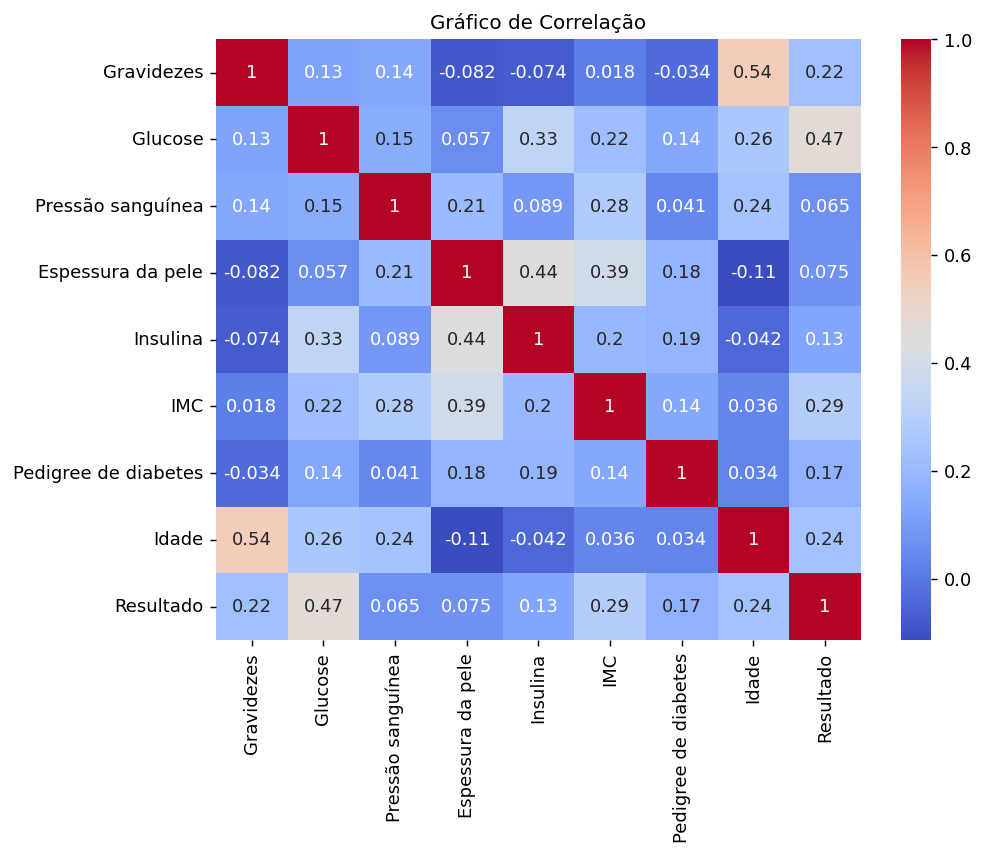

In [ ]:
plt.figure(figsize = [8,6], dpi = 130)
plt.title("Gráfico de Correlação", fontsize = 11)
sns.heatmap (dataset.corr(), annot= True, cmap = "coolwarm")


In [ ]:
#função de plot de correlação
def plot_correlation(x_value,y_value):
    plt.figure(figsize= [20, 4], dpi = 150)
    plt.scatter (dataset[x_value], dataset[y_value], color="red")
    plt.title("Relação entre {} e {}".format(x_value,y_value), weight='bold', fontsize=25)
    plt.xticks( fontsize = 20)
    plt.yticks(fontsize=20)
    plt.xlabel(x_value, fontsize=20)
    plt. ylabel(y_value, fontsize = 20)
    plt.grid()
    plt.show()

A variavel de melhor correlação com o resultado é o nível de glucose. Podemos plotar essa correlação em um gráfico

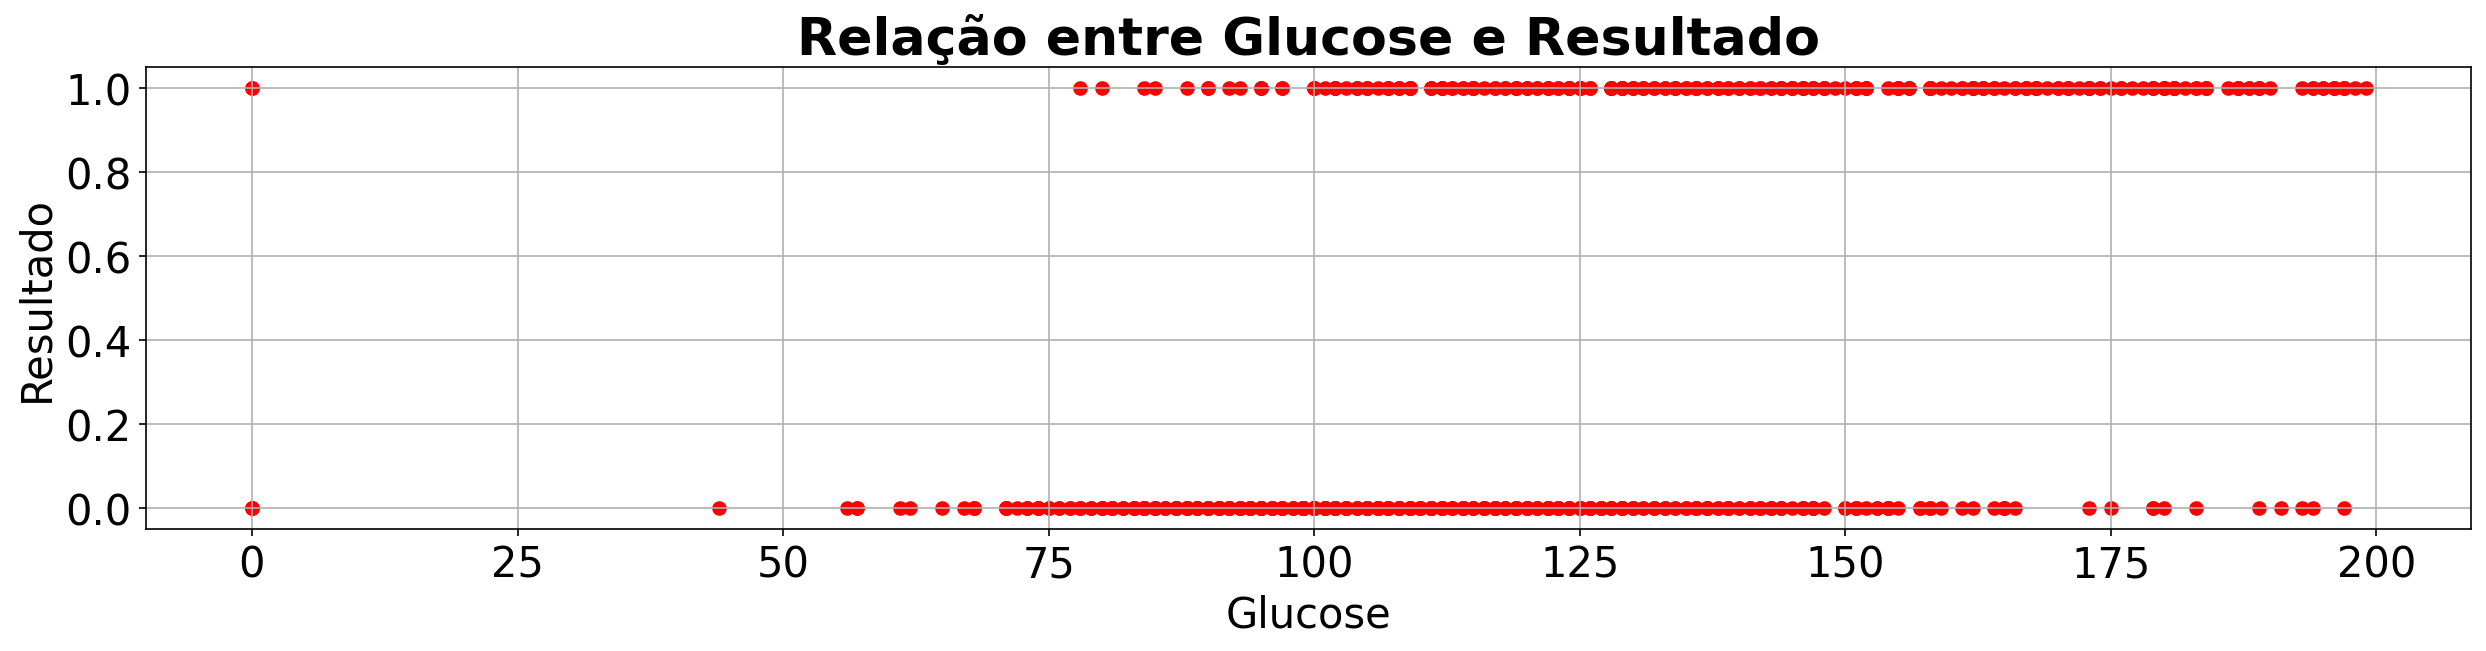

In [ ]:
plot_correlation("Glucose","Resultado")

Percebe-se que a partir de niveis de glucose acima de 160-170 a paciente tem mais chance de ter diabetes. Enquanto se ela tiver glucose abaixo de 100 ela tem menos chance de ter diabetes. Entre 100 e 170 é dificil dizer se a pessoa terá ou não diabetes se baseando apenas na glucose

In [ ]:
# Descobrir a maior correlação positiva entre variaveis que não seja da diagonal principal
sorted_series_descending = dataset.corr().stack().sort_values(ascending=False)
tenth_largest = sorted_series_descending.iloc[9]

print(tenth_largest)

0.5443412284023392


A maior correlação positiva é o valor de 0.54. É a correlação entre gravidez e idade. Essa analise faz sentido pois, por mais que a quantidade total possa variar entre regiões, essa tendencia de aumento conforme a idade é universal pois quanto mais uma mulher vive mais gravidezes ela pode acumular

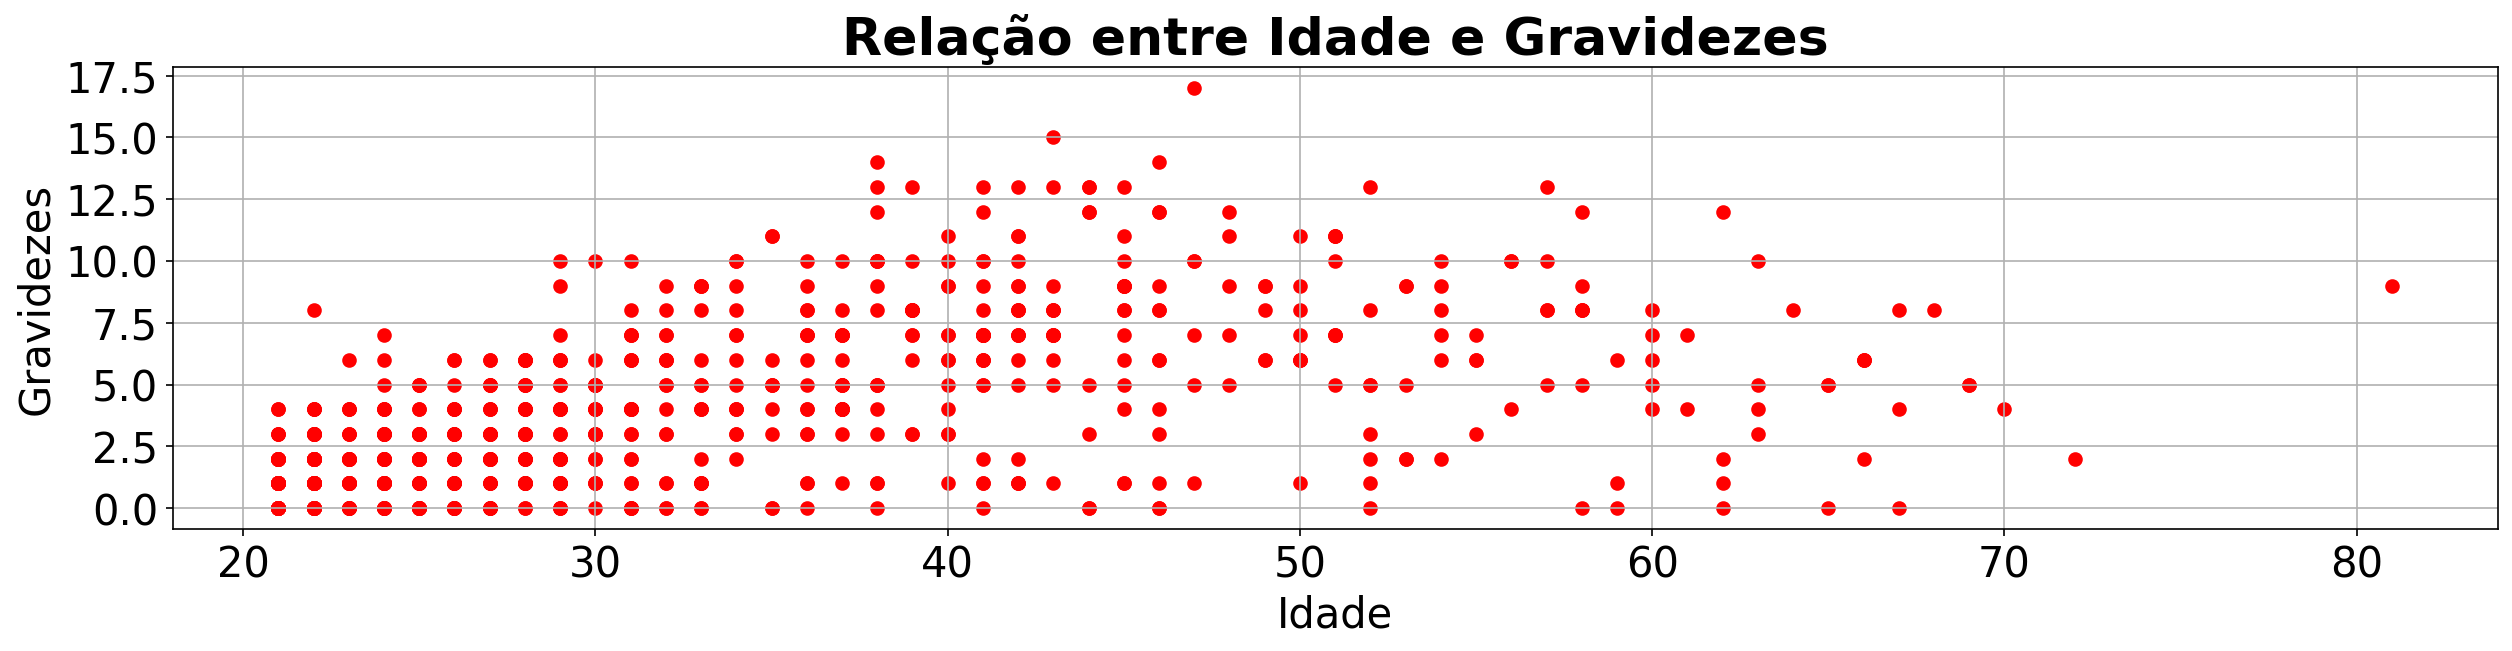

In [ ]:
plot_correlation("Idade","Gravidezes")

In [ ]:
# Descobrir a maior correlação negativa entre variaveis
sorted_series_ascending = dataset.corr().stack().sort_values(ascending=True)
minimum = sorted_series_ascending.iloc[0]
print(minimum)


-0.11397026236774152


A menor correlação negativa é o valor de 0.54. É a correlação entre Espessura da pele e idade

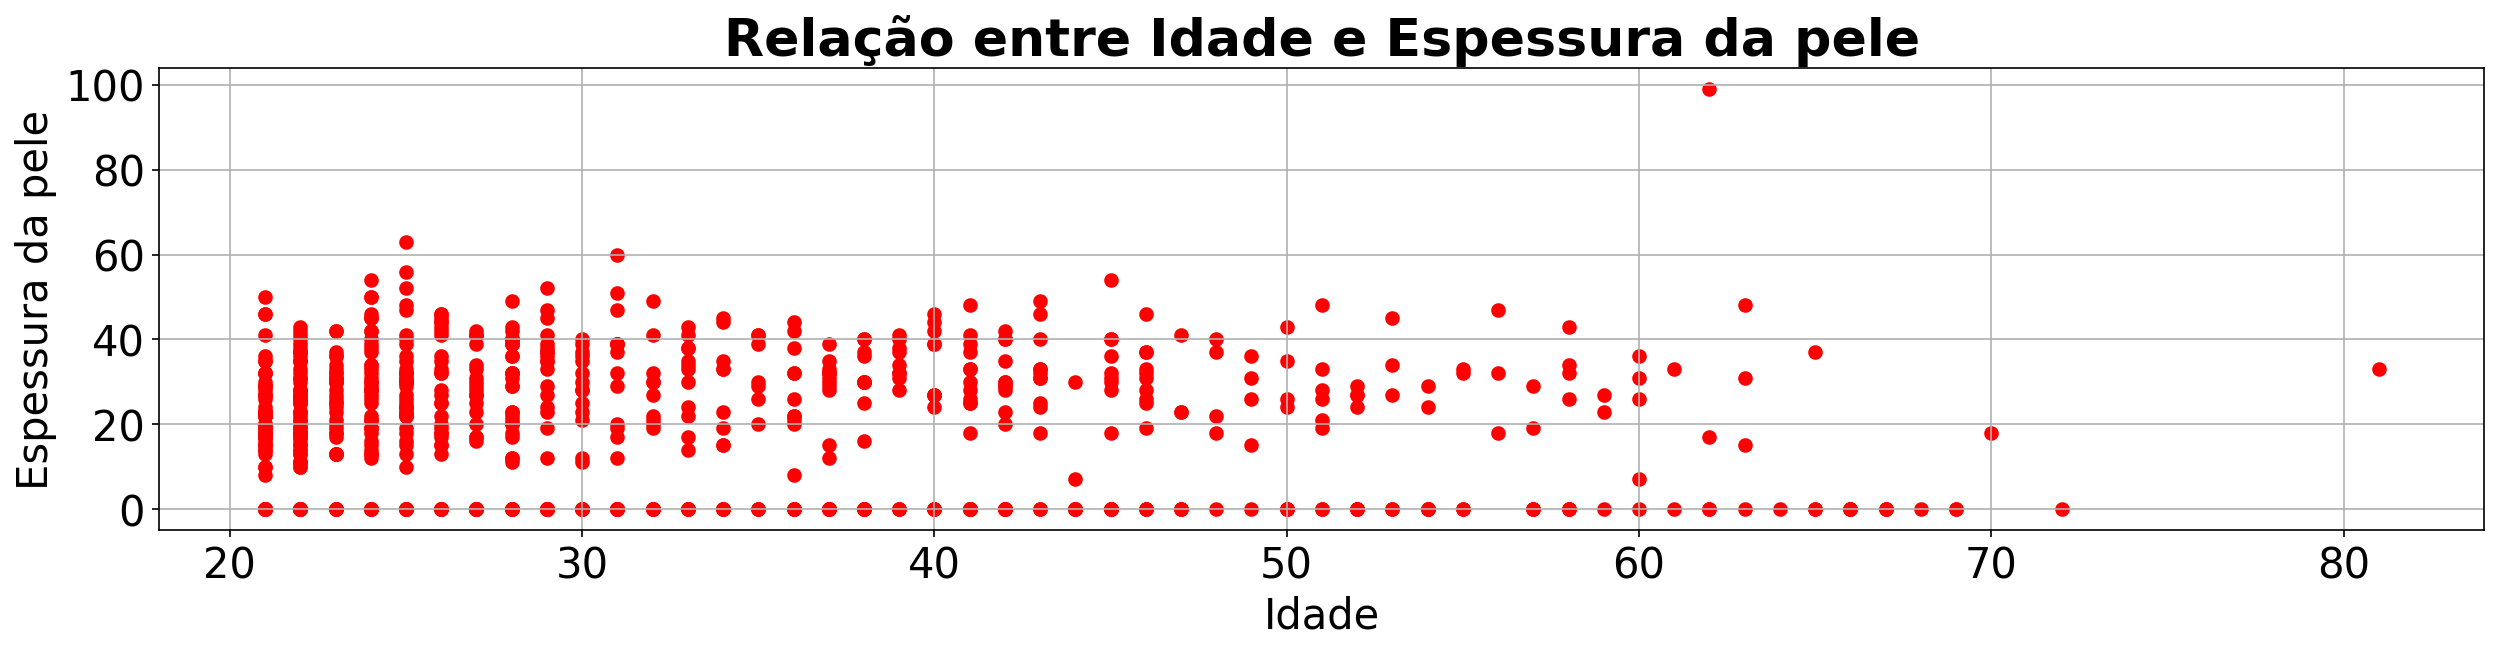

In [ ]:
plot_correlation("Idade", "Espessura da pele")

Uma variavel em particular chama a anteção: Função que pontua a probabilidade de diabetes com base no histórico familiar. Não o maior fator isolado para diabetes mas também não se trata do pior. Vamos analisar sua correlação

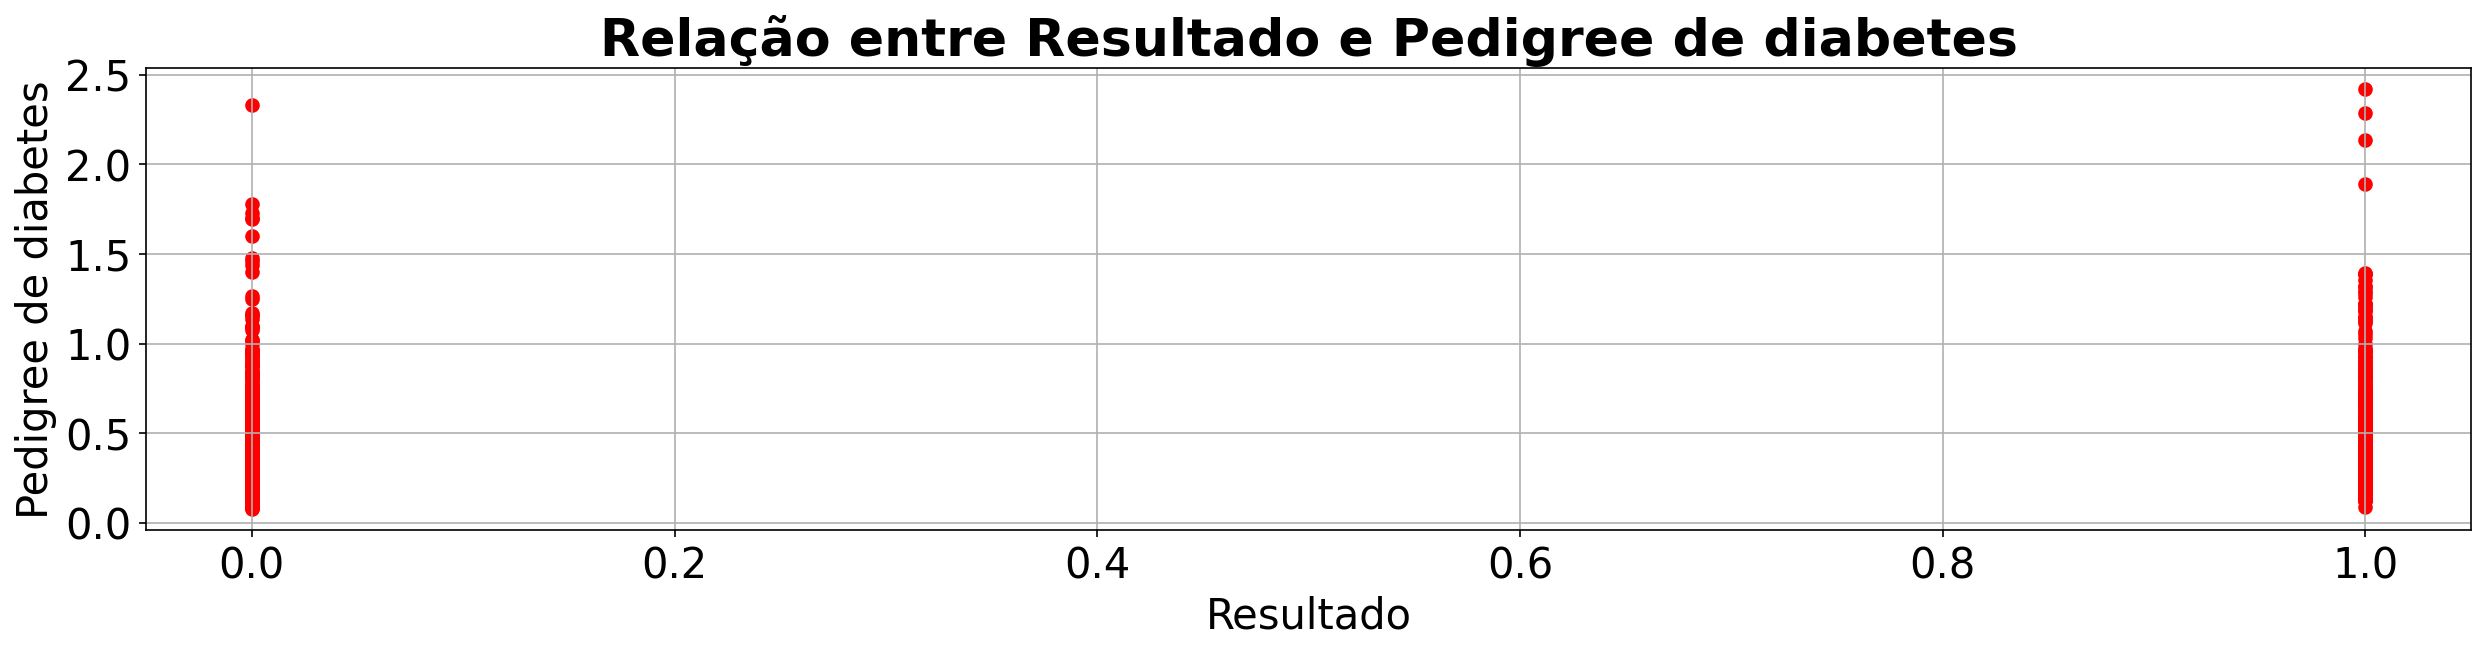

In [ ]:
plot_correlation("Resultado", "Pedigree de diabetes")

## Projeto

### Construção

Para realizar os testes com os algoritimos de ML foi desenvolvido um projeto de testes de algoritimos de machine learning utilizando conceitos de Orientação a Objetos e SOLID. Boa parte do código foi inspirado nos exemplos presentes no survey do Raphael Cabral, o que contribuiu para grande manutenibilidade e legibilidade do código.

O projeto se encontra no link: https://github.com/Esduard/Projeto-de-Previs-o-de-Risco-de-Diabetes-com-Aprendizado-de-M-quina/tree/main

Para executar o projeto procure o arquivo "main.py" e execute-o. 

Se desejar, podem ser realizadas alterações nos componentes utilizados. Pode-se alterar a quantidade de modelos ou transformadores bem como definir novos componentes como algoritimos não implementados, desde que sigam o padrão da sua classe abstrata respectiva, no caso de implementar um novo algoritmo ele deveria estar de acordo com os algoritmos implementados no arquivo "model.py"

Uma alteração importante a ser resaltada é o atributo "seed", argumento da classe "SelectKBestPreProcessor" essa seed dita os resultados de todo o sistema e precisa se manter inalterada para elicitar as mesmas respostas

O output completo gerado pelo código se encontra no repositório do projeto como o arquivo "output.txt". Para manter a brevidade deste documento, abaixo se encontra apenas o dataframe indicando os melhores algoritimos:

### Planilha dos melhores resultados para cada parâmetro

|                                            lines/columns |                                              precision |                                   recall |                                 f1-score |                                  support |
| ---------------------------------------------------- | ------------------------------------------------------ | ---------------------------------------- | -------------------------------------- | ----------------------------------------- |
|                                                    0|                      (Bag-orig, 0.8391608391608392) |  (ET-StandardScaler, 0.9183673469387755) |  (LR-StandardScaler, 0.8387096774193548) |                    (Voting-orig, 147.0) |
|                                                    1 |             (ET-StandardScaler, 0.7857142857142857) |          (CART-orig, 0.7380952380952381) |           (Bag-orig, 0.7093023255813954) |                     (Voting-orig, 84.0) |
|      accuracy  |       (KNN-MinMaxScaler, 0.7878787878787878) |   (KNN-MinMaxScaler, 0.7878787878787878) |   (KNN-MinMaxScaler, 0.7878787878787878) |  (KNN-MinMaxScaler, 0.7878787878787878) |
|                macro avg        |     (ET-StandardScaler, 0.7785714285714286) |           (Bag-orig, 0.7712585034013606) |   (KNN-MinMaxScaler, 0.7702425657160256) |                    (Voting-orig, 231.0) |
|    weighted avg |    (KNN-MinMaxScaler, 0.7873582783221336) |   (KNN-MinMaxScaler, 0.7878787878787878) |   (KNN-MinMaxScaler, 0.7876032219074948) |                    (Voting-orig, 231.0) |



### Resultados pontuados por desvio do melhor valor (menor é melhor)


|         Model         |    Value   |
|-----------------------|-----------:|
| KNN-MinMaxScaler      |   0.217134 |
| Bag-orig              |   0.257755 |
| KNN-orig              |   0.318385 |
| LR-StandardScaler     |   0.364821 |
| LR-orig               |    0.43580 |
| Bag-MinMaxScaler      |   0.494082 |
| KNN-StandardScaler    |   0.494082 |
| RF-orig               |   0.494082 |
| LR-MinMaxScaler       |   0.506179 |
| ET-orig               |   0.547337 |
| ET-StandardScaler     |   0.550926 |
| Voting-MinMaxScaler   |   0.565837 |
| RF-MinMaxScaler       |   0.624598 |
| Voting-orig           |   0.634443 |
| RF-StandardScaler     |   0.652262 |
| Bag-StandardScaler    |   0.659375 |
| Ada-StandardScaler    |   0.793775 |
| Voting-StandardScaler |   0.793775 |
| Ada-orig              |   0.793775 |
| Ada-MinMaxScaler      |   0.793775 |
| NB-MinMaxScaler       |   0.876883 |
| NB-StandardScaler     |   0.876883 |
| NB-orig               |   0.876883 |
| GB-StandardScaler     |   0.927722 |
| ET-MinMaxScaler       |   0.945821 |
| GB-orig               |   0.992444 |
| GB-MinMaxScaler       |   0.992444 |
| CART-MinMaxScaler     |   1.310754 |
| CART-StandardScaler   |   1.310754 |
| CART-orig             |   1.310754 |

### Conclusão dos resultados

Conclui-se que o melhor algoritmo é o Algoritimo KNN utilizando o transformador MinMaxScaler. O trecho de output abaixo indica quais os parâmetros do KNN que usamos para os testes. Eles foram definidos usando GridSearch.

```python
KNN-MinMaxScaler - Melhor: 0.7580013976240392 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 19, 'KNN__weights': 'uniform'}
```

## Implantação

Para realizar a implantação do modelo devemos gerar o arquivo Pickle. Este arquivo irá conter o modelo em formato serializado para eventualmente ser deserializado no nosso ambiente de escolha de implantação do modelo.

Dado o contexto provido pelo usuário. Sabemos que ele faz parte de uma grande rede de hospitais, que por sua vez já possui uma equipe para desenvolver uma interface gráfica para uso dos médicos e possuem contratos com as principais provedoras de nuvem do mercado. Como o cliente já tem familiaridade com a manutenção de recursos da nuvem, a implantação mais sensata me parece ser disponibilizar o modelo de machine learning como um serviço separado na nuvem.

O serviço poderia ser disponibilizado Por meio de um endpoint da Google, Microsoft Azure ou AWS para a aplicação de front-end utilzada pelos doutores. Assim, eles poderiam inserir as informações de um novo paciente e prontamente receber um resultado pela internet.

Essa forma de implantação possui diversas vantagens para o cliente pois permite alto controle da escalabilidade e, por consequencia, eficiencia em relação ao custo. Outro fator relevante é o da segurança das informações. Como os hospitais da rede devem se comunicar de forma segura pela internet, a segurança provida pelo serviço de nuvem é fundamental para atender aos requisitos da LGPD.

Há ressalvas a serem feitas sobre essa forma de implantação. A implantação por serviço de nuvem está sujeita a forte dependência de conexões estáveis à internet e potencial bloqueio por parte do fornecedor. Além disso ele tambéme pode ter uma certa latencia dependeno da localização do servidor e um custo elevado. Entrentanto, se trata de uma grande rede hospitalar com diversas undiades localizadas em diversas regiões e que já tem uma equipe técnica responsavel por lidar com o provedor em caso de eventuais atrititos.